In [ ]:
!pip install hls4ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.3/572.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyparser: filename=pyparser-1.0-py3-none-any.whl size=4915 sha256=e4f128589d515f54b176268c0bda3937eb37a509787a86eefd6917cc4c72ea11
  Stored in directory: /root/.cache/pip/wheels/25/87/78/ff95e8a747dc534fbd199fb3ea06d80935bc87e44567bbdb31
  Created wheel for parse: filename=parse-1.6.5-py3-none-any.whl size=18155 sha256=0fe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall keras
!pip install keras==2.8.0

Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.8.0 which is incompatible.


In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
Y
  Successfully uninstalled tensorflow-2.15.0


In [ ]:
!pip install tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully uninstalled google-auth-oauthlib-1.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
  

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import hls4ml
import shutil
import os
import random

import tensorflow as tf
import keras
from keras import layers
from keras import activations
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, Dense, BatchNormalization, MaxPooling2D, Activation, Flatten, AveragePooling2D, MaxPool2D, Concatenate
from qkeras.qlayers import QDense, QActivation
from qkeras.qconvolutional import QConv2D
from qkeras.qpooling import QAveragePooling2D
from qkeras.quantizers import quantized_bits, quantized_relu, smooth_sigmoid

In [ ]:
def baby_YOLO_conv():
    """
    Baby YOLO model architecture

    :return: Keras model
    """

    tf.compat.v1.reset_default_graph() #reset's the default graph
    x = inputs = keras.Input(shape=(48, 128, 1), name='input_1')

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(15,3,alpha=1), bias_quantizer=quantized_bits(7,0,alpha=1), kernel_initializer='lecun_uniform')(x)
    x = QActivation(activation=quantized_relu(16,8))(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x) # size: 64x64

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(16,2,alpha=1), bias_quantizer=quantized_bits(7,2,alpha=1), kernel_initializer='lecun_uniform')(x)
    x = QActivation(activation=quantized_relu(16,8))(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)  # size: 64x64

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(16,3,alpha=1), bias_quantizer=quantized_bits(8,2,alpha=1), kernel_initializer='lecun_uniform')(x)
    x = QActivation(activation=quantized_relu(16,8))(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)  # size: 32x32

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(16,2,alpha=1), bias_quantizer=quantized_bits(10,2,alpha=1), kernel_initializer='lecun_uniform')(x)
    x = QActivation(activation=quantized_relu(16,8))(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)  # size: 16x16

    x_prob = QConv2D(1, kernel_size=3, padding='same', name='x_prob', activation='sigmoid', kernel_quantizer=quantized_bits(11,2,alpha=1), bias_quantizer=quantized_bits(2,1,alpha=1), kernel_initializer='lecun_uniform')(x)
    x_boxes = QConv2D(4, kernel_size=3, padding='same', name='x_boxes', kernel_quantizer=quantized_bits(17,3,alpha=1), bias_quantizer=quantized_bits(4,3,alpha=1), kernel_initializer='lecun_uniform')(x)

    gate = tf.where(x_prob > 0.5, tf.ones_like(x_prob), tf.zeros_like(x_prob))
    x_boxes = x_boxes * gate

    x = Concatenate()([x_prob, x_boxes])

    model = tf.keras.models.Model(inputs, x)
    return model

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

grid_size = 16  # image_size / mask_size
num_channels = 5  # Number of channels in YOLO output

def make_gaussians(X, y):
    """
    Generates a new data sample by placing random Gaussian blobs around a 29x48 frame
    Adds random noise to the image and additional noise near the centers of the Gaussians

    :param X: New empty YOLO data array
    :param y: New empty YOLO labels data array
    """

    num_gaussian = np.random.randint(2, 4)  # randomly choose the number of gaussian to generate (between 1 and 5)

    for _ in range(num_gaussian):  # iterate over the number of gaussians

        cx, cy = np.random.randint(0, 128), np.random.randint(0, 48)  # generate a random center for the gaussian
        std_devs = np.random.randint(1, 5, size=num_channels)  # random standard deviations for each channel
        std_devs = std_devs.astype(np.float32)

        x_coords = np.arange(128)
        y_coords = np.arange(48)
        xx, yy = np.meshgrid(x_coords, y_coords)  # Create a meshgrid covering the entire image

        for i in range(num_channels):
            # Calculate Gaussian using provided formula
            gaussian = np.exp(-((xx - cx) ** 2 + (yy - cy) ** 2) / (std_devs[i] ** 2))
            gaussian = gaussian[..., np.newaxis]  # Add a new axis for channel
            X += gaussian

        # Compute bounding box coordinates
        mx, my = cx // grid_size % (128 // grid_size), cy // grid_size % (48 // grid_size)
        channels = y[my][mx]

        if channels[0] > 0:
            continue

        channels[0] = 1.0
        channels[1] = (cx - 3 * std_devs[0]) - (mx * grid_size)  # x1 - increase bounding box size
        channels[2] = (cy - 3 * std_devs[0]) - (my * grid_size)  # y1 - increase bounding box size
        channels[3] = (cx + 3 * std_devs[0]) - (mx * grid_size)  # x2 - increase bounding box size
        channels[4] = (cy + 3 * std_devs[0]) - (my * grid_size)  # y2 - increase bounding box size

    # Add random noise to the image
    noise_level = 0.3  # Adjust the noise level as needed
    noise = np.random.normal(loc=0.0, scale=noise_level, size=X.shape)
    X += noise

    # Add noise near the centers of the Gaussians
    center_noise_level = 0.3  # Adjust the noise level near the centers as needed
    for cx, cy in zip(np.random.randint(0, 128, size=num_gaussian), np.random.randint(0, 48, size=num_gaussian)):
        # Generate noise centered around the Gaussian centers
        center_noise = np.exp(-((xx - cx) ** 2 + (yy - cy) ** 2) / (2 * 5 ** 2))  # Larger standard deviation for more intense noise
        center_noise *= center_noise_level  # Scale the intensity of the noise
        center_noise = center_noise[..., np.newaxis]
        X += center_noise

    # Clip the image to keep pixel values within valid range
    X = np.clip(X, 0.0, 1.0)

def make_data(size):
    """
    Generates a new dataset for YOLO training

    :param size: Number of samples to generate for training, can be larger than MNIST dataset
    :return: New dataset and labels
    """

    X = np.zeros((size, 48, 128, 1), dtype=np.float32)  # New data sample of 29x48
    y = np.zeros((size, 3, 8, num_channels), dtype=np.float32)  # New data output consists of probability and bounding box

    # Generate data
    for i in range(size):
        make_gaussians(X[i], y[i])

    X = np.clip(X, 0.0, 1.0)
    return X, y

def show_predict(X, y, threshold=0.6):
    """
    Display single prediction results

    :param X: Data sample input
    :param y: Model predictions
    :param threshold: Probability threshold
    """
    output_coords = []
    print("empty:" + str(output_coords))
    X = X.copy()
    for mx in range(8):
        for my in range(3):
            channels = y[my][mx]
            prob, x1, y1, x2, y2 = channels[:5]

            #if prob < threshold we won't show any thing
            if prob < threshold:
                continue

            color = 255
            # bounding box
            px, py = (mx * grid_size) + x1, (my * grid_size) + y1
            px2, py2 = (mx * grid_size) + x2, (my * grid_size) + y2

            out_coords = [int(px), int(px2), int(py), int(py2)]
            output_coords.append(out_coords)

            cv2.rectangle(X, (int(px), int(py)), (int(px2), int(py2)), -1, 1)
            print("prob: " + str(prob) + ", x1: " + str(int(px)) + ", y1: " + str(int(py)) + ", x2: " + str(int(px2)) + ", y2: " + str(int(py2)))

    plt.imshow(X, cmap="gray")
    return output_coords

In [ ]:
idx_p = [0] # probability
idx_bb = [1, 2, 3, 4] # bounding box

@tf.function
def loss_bb(y_true, y_pred):
    y_true = tf.gather(y_true, idx_bb, axis=-1)
    y_pred = tf.gather(y_pred, idx_bb, axis=-1)

    loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
    return tf.reduce_mean(loss[loss > 0.0])

@tf.function
def loss_p(y_true, y_pred):
    y_true = tf.gather(y_true, idx_p, axis=-1)
    y_pred = tf.gather(y_pred, idx_p, axis=-1)

    loss = tf.losses.binary_crossentropy(y_true, y_pred)
    return tf.reduce_sum(loss)

@tf.function
def loss_func(y_true, y_pred):
    return loss_bb(y_true, y_pred) + loss_p(y_true, y_pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.003)

X shape: (1, 48, 128, 1)
y shape: (1, 3, 8, 5)
empty:[]
prob: 1.0, x1: 61, y1: 22, x2: 79, y2: 40
prob: 1.0, x1: 86, y1: 11, x2: 104, y2: 29
prob: 1.0, x1: 109, y1: 29, x2: 115, y2: 35
[[61, 79, 22, 40], [86, 104, 11, 29], [109, 115, 29, 35]]


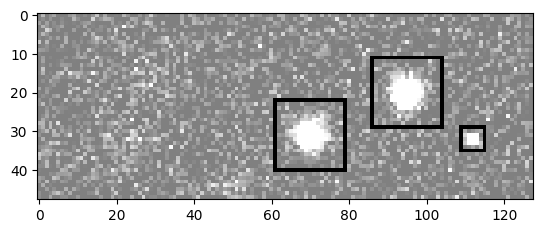

In [ ]:
# Generate test image
X, y = make_data(1)
print("X shape:", X.shape)
print("y shape:", y.shape)

out = show_predict(X[0], y[0])
print(out)

In [ ]:
model = baby_YOLO_conv()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 128, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 q_conv2d (QConv2D)             (None, 48, 128, 16)  160         ['input_1[0][0]']                
                                                                                                  
 q_activation (QActivation)     (None, 48, 128, 16)  0           ['q_conv2d[0][0]']               
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 24, 64, 16)   0           ['q_activation[0][0]']       

In [ ]:
model.compile(loss=loss_func, optimizer=opt)

In [ ]:
batch_size = 32
X_train, y_train = make_data(size=batch_size * 400)
print(X_train.shape)
print(y_train.shape)

KeyboardInterrupt: 

In [ ]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=30, shuffle=True)

Epoch 1/30
400/400 [==============================] - 113s 276ms/step - loss: 73.6570
Epoch 2/30
400/400 [==============================] - 101s 251ms/step - loss: 20.3416
Epoch 3/30
400/400 [==============================] - 119s 298ms/step - loss: 16.8425
Epoch 4/30
400/400 [==============================] - 95s 238ms/step - loss: 16.2616
Epoch 5/30
400/400 [==============================] - 96s 241ms/step - loss: 14.3849
Epoch 6/30
400/400 [==============================] - 104s 261ms/step - loss: 13.7215
Epoch 7/30
400/400 [==============================] - 94s 236ms/step - loss: 13.9202
Epoch 8/30
400/400 [==============================] - 96s 241ms/step - loss: 12.7512
Epoch 9/30
400/400 [==============================] - 94s 235ms/step - loss: 12.7971
Epoch 10/30
400/400 [==============================] - 97s 241ms/step - loss: 13.0178
Epoch 11/30
400/400 [==============================] - 102s 255ms/step - loss: 12.6671
Epoch 12/30
400/400 [==============================] - 95s

In [ ]:
model.save_weights('/content/drive/MyDrive/FOLO48x128/FOLO_weights.h5')

In [ ]:
model.load_weights('/content/drive/MyDrive/FOLO48x128/FOLO.weights2.h5')

In [ ]:
def crop_model():
    """
    Baby YOLO model architecture with new custom layer

    :return: Keras model
    """

    tf.compat.v1.reset_default_graph()
    x = inputs = keras.Input(shape=(48, 128, 1), name='input_1')

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(15,3,alpha=1), bias_quantizer=quantized_bits(7,0,alpha=1), kernel_initializer='lecun_uniform')(x)
    x = QActivation(activation=quantized_relu(16,8))(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x) # size: 64x64

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(16,2,alpha=1), bias_quantizer=quantized_bits(7,2,alpha=1), kernel_initializer='lecun_uniform')(x)
    x = QActivation(activation=quantized_relu(16,8))(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)  # size: 64x64

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(16,3,alpha=1), bias_quantizer=quantized_bits(8,2,alpha=1), kernel_initializer='lecun_uniform')(x)
    x = QActivation(activation=quantized_relu(16,8))(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)  # size: 32x32

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(16,2,alpha=1), bias_quantizer=quantized_bits(10,2,alpha=1), kernel_initializer='lecun_uniform')(x)
    x = QActivation(activation=quantized_relu(16,8))(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)  # size: 16x16

    x_prob = QConv2D(1, kernel_size=3, padding='same', name='x_prob', activation='sigmoid', kernel_quantizer=quantized_bits(11,2,alpha=1), bias_quantizer=quantized_bits(2,1,alpha=1), kernel_initializer='lecun_uniform')(x)
    x_boxes = QConv2D(4, kernel_size=3, padding='same', name='x_boxes', kernel_quantizer=quantized_bits(17,3,alpha=1), bias_quantizer=quantized_bits(4,3,alpha=1), kernel_initializer='lecun_uniform')(x)

    x = Concatenate()([x_prob, x_boxes])

    original_image = tf.keras.Input(shape=(48, 128, 1), name='original_image')
    x = KCrop()([x, original_image])

    model = tf.keras.models.Model(inputs=[inputs, original_image], outputs=x)
    return model

In [ ]:
model_crop = crop_model()
model_crop.summary()

ValueError: Exception encountered when calling layer "k_crop" (type KCrop).

in user code:

    File "<ipython-input-30-72e66fcf3450>", line 16, in call  *
        top_5_coords = tf.gather_nd(bbox[..., 1:], top_5_indices)

    ValueError: indices.shape[-1] must be <= params.rank, but saw indices shape: [?,3,5] and params shape: [?,3,8,4] for '{{node k_crop/GatherNd}} = GatherNd[Tindices=DT_INT32, Tparams=DT_FLOAT](k_crop/strided_slice_1, k_crop/TopKV2:1)' with input shapes: [?,3,8,4], [?,3,5].


Call arguments received:
  • inputs=['tf.Tensor(shape=(None, 3, 8, 5), dtype=float32)', 'tf.Tensor(shape=(None, 48, 128, 1), dtype=float32)']

In [ ]:
model_crop.load_weights('/content/drive/MyDrive/FOLO48x128/FOLO_weights.h5')

In [ ]:
import matplotlib.pyplot as plt

def plot_cropped_images(cropped_images, num_images=5):
    """
    Plot the 5 cropped 48x48 images returned by the crop layer.

    :param cropped_images: numpy array of shape (batch_size, num_crops, 48, 48, 1)
    :param num_images: Number of images to plot (default is 5)
    """
    # Ensure that the number of images to plot does not exceed the actual number of images available
    num_images = min(num_images, cropped_images.shape[1])

    fig, axs = plt.subplots(1, num_images, figsize=(15, 15))

    for i in range(num_images):
        ax = axs[i] if num_images > 1 else axs
        ax.imshow(cropped_images[0, i, :, :, 0], cmap='gray')
        ax.axis('off')
        ax.set_title(f"Cropped Image {i + 1}")

    plt.show()

# Example usage:
# Assume `cropped_images` is the output from the crop layer
X, y = make_data(size=1)
cropped_images = model_crop.predict(X)
plot_cropped_images(cropped_images)

InvalidArgumentError: Graph execution error:

Detected at node 'model/custom_crop_layer/map/while/map/while/crop_to_bounding_box/Assert_2/Assert' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-45-9dbf11f2f7bb>", line 26, in <cell line: 26>
      cropped_images = model_crop.predict(X)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1982, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1801, in predict_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1790, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1783, in run_step
      outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1751, in predict_step
      return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py", line 451, in call
      return self._run_internal_graph(
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "<ipython-input-41-55df7d7ec070>", line 67, in call
      crops = tf.map_fn(lambda x: crop_single_image(x[0], x[1], x[2]), (confidence, bboxes, inputs), dtype=tf.float32)
    File "<ipython-input-41-55df7d7ec070>", line 67, in call
      crops = tf.map_fn(lambda x: crop_single_image(x[0], x[1], x[2]), (confidence, bboxes, inputs), dtype=tf.float32)
    File "<ipython-input-41-55df7d7ec070>", line 64, in crop_single_image
      crops = tf.map_fn(crop_bbox, selected_bboxes, dtype=tf.float32)
    File "<ipython-input-41-55df7d7ec070>", line 54, in crop_bbox
      crop = tf.image.crop_to_bounding_box(
Node: 'model/custom_crop_layer/map/while/map/while/crop_to_bounding_box/Assert_2/Assert'
assertion failed: [width must be >= target + offset.]
	 [[{{node model/custom_crop_layer/map/while/map/while/crop_to_bounding_box/Assert_2/Assert}}]] [Op:__inference_predict_function_51482]

empty:[]
prob: 0.99969125, x1: 30, y1: 0, x2: 78, y2: 48
prob: 1.0, x1: 55, y1: 0, x2: 103, y2: 48
(1, 6, 16, 5)


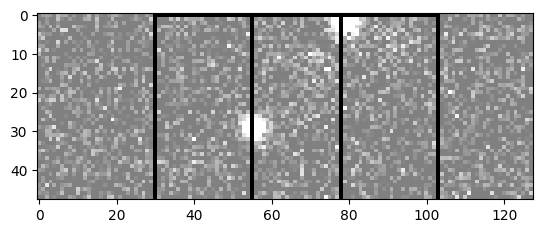

In [ ]:
def get_regions(numbers=None, threshold=0.1):
    """
    View single model prediction

    :param threshold: Probability threshold
    """

    X, y = make_data(size=1)
    y = model.predict(X)
    coords = show_predict(X[0], y[0], threshold=threshold)
    cropped_images = np.zeros((len(coords), 48, 48, 1), dtype=np.float32)

    for idx, coord in enumerate(coords):
        x1, x2, y1, y2 = coord
        region = X[0][y1:y2, x1:x2]
        cropped_images[idx] = region

    print(y.shape)
    return cropped_images

tensors = get_regions(threshold=0.4)

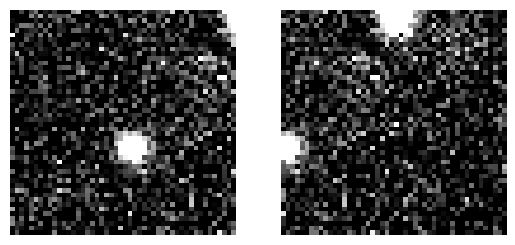

In [ ]:
for i in range(len(tensors)):
    plt.subplot(1, len(tensors), i+1)
    plt.imshow(tensors[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.show()

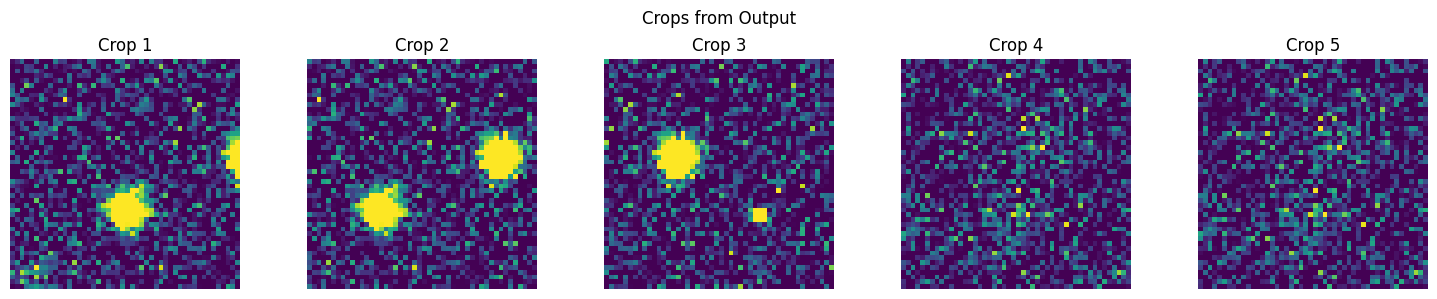

In [199]:
# Example usage
bbox = y
image = X
layer = KCrop()
output = layer([bbox, image])

plot_crops(output)



In [198]:
def plot_crops(crops):
    assert crops.shape == (1, 5, 48, 48, 1), "Expected shape (1, 5, 48, 48, 1) for crops tensor"

    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle('Crops from Output')

    for i in range(5):
        crop = crops[0, i, :, :, :]  # Extract the crop for the i-th centroid
        axes[i].imshow(crop)
        axes[i].axis('off')
        axes[i].set_title(f'Crop {i+1}')

    plt.tight_layout()
    plt.show()

In [195]:
class KCrop(tf.keras.layers.Layer):
    def __init__(self, k=5, grid_size=16, crop_size=48, **kwargs):
        super(KCrop, self).__init__(**kwargs)
        self.k = k
        self.grid_size = grid_size
        self.crop_size = crop_size

    def call(self, inputs):
        bbox, image = inputs
        # Get confidence
        # Separate the confidence scores and the coordinates
        batch_size = tf.shape(bbox)[0]
        confidence = bbox[:, :, :, 0]  # Shape (batch, 3, 8)
        centroids = bbox[:, :, :, 1:]  # Shape (batch, 3, 8, 4)

        height, width = tf.shape(image)[1], tf.shape(image)[2]

        # Flatten the grid dimensions for confidence
        confidence_flat = tf.reshape(confidence, (batch_size, -1))  # Shape (batch, 24)

        # Flatten the grid dimensions for centroids
        centroids_flat = tf.reshape(centroids, (batch_size, -1, 4))  # Shape (batch, 24, 4)

        # Find the indices of the top k confidence scores
        topk_values, topk_indices = tf.nn.top_k(confidence_flat, k=self.k, sorted=True)

        # Calculate the mx and my grid positions
        grid_x, grid_y = tf.meshgrid(tf.range(8), tf.range(3), indexing='ij')
        grid_x = tf.reshape(grid_x, [-1])  # Shape (24,)
        grid_y = tf.reshape(grid_y, [-1])  # Shape (24,)

        # Gather the corresponding grid positions for the top-k indices
        topk_grid_x = tf.gather(grid_x, topk_indices)  # Shape (batch, k)
        topk_grid_y = tf.gather(grid_y, topk_indices)  # Shape (batch, k)

        topk_grid_x = tf.cast(topk_grid_x, tf.float32)
        topk_grid_y = tf.cast(topk_grid_y, tf.float32)

        # Gather the corresponding centroids
        batch_indices = tf.range(batch_size)[:, tf.newaxis]
        batch_indices = tf.tile(batch_indices, [1, self.k])  # Shape (batch, k)
        gather_indices = tf.stack([batch_indices, topk_indices], axis=-1)  # Shape (batch, k, 2)
        topk_centroids = tf.gather_nd(centroids_flat, gather_indices)  # Shape (batch, k, 4)

        # Scale and transform the centroids
        x1 = topk_centroids[:, :, 0]
        y1 = topk_centroids[:, :, 1]
        x2 = topk_centroids[:, :, 2]
        y2 = topk_centroids[:, :, 3]

        px1 = (topk_grid_x * self.grid_size) + x1
        py1 = ((topk_grid_y) * self.grid_size) + y1
        px2 = (topk_grid_x * self.grid_size) + x2
        py2 = ((topk_grid_y) * self.grid_size) + y2

         # Calculate the crop boundaries
        px_center = (px1 + px2) / 2
        py_center = (py1 + py2) / 2

        crop_x1 = tf.cast(tf.clip_by_value(px_center - tf.cast(self.crop_size // 2, tf.float32), 0.0, tf.cast(width - self.crop_size, tf.float32)), tf.int32)
        crop_y1 = tf.cast(tf.clip_by_value(py_center - tf.cast(self.crop_size // 2, tf.float32), 0.0, tf.cast(height - self.crop_size, tf.float32)), tf.int32)
        crop_x2 = crop_x1 + tf.cast(self.crop_size, tf.int32)
        crop_y2 = crop_y1 + tf.cast(self.crop_size, tf.int32)

        # Manually slice the original image tensor
        crops = []
        for i in range(self.k):
            cropx1 = crop_x1[0, i]
            cropx2 = crop_x2[0, i]
            cropy1 = crop_y1[0, i]
            cropy2 = crop_y2[0, i]
            crop = image[:, tf.constant(cropy1):tf.constant(cropy2),
                                  tf.constant(cropx1):tf.constant(cropx2), :]
            crops.append(crop)

        crops = tf.stack(crops, axis=1)  # Shape (batch, k, crop_size, crop_size, channels)
        return crops

class HCrop(hls4ml.model.layers.Layer):
    '''hls4ml implementation of custom cropping layer'''

    def initialize(self):
        inp = self.get_input_variable()
        shape = [None, 48, 48, 5]  # new output shape

        dims = ['OUT_BATCH', 'OUT_CHANNELS', 'OUT_HEIGHT', 'OUT_WIDTH']
        self.add_output_variable(shape, dims)

def parse_crop_layer(keras_layer, input_names, input_shapes, data_reader):
    '''Parser for converter'''

    layer = {}
    layer['class_name'] = 'HCrop'
    layer['name'] = keras_layer['config']['name']
    layer['input_shape'] = input_shapes[0]
    outshape = [[None, 48, 48, 5]]  # Shape should match the output shape of the layer

    if input_names is not None:
        layer['inputs'] = input_names

    return layer, outshape

crop_config_template = """struct config{index} : nnet::crop_config {{
    static const unsigned input_height = 128;
    static const unsigned input_width = 48;
    static const unsigned output_height = 48;
    static const unsigned output_width = 48;
    static const unsigned n_crops = 5;
}};\n"""

crop_function_template = 'nnet::crop<{input_t}, {original_image_t}, {output_t}, {config}>({input}, {original_image}, {output});'
crop_include_list = ['nnet_utils/nnet_crop.h']

class HCropConfigTemplate(hls4ml.backends.template.LayerConfigTemplate):
    def __init__(self):
        super().__init__(HCrop)
        self.template = crop_config_template

    def format(self, node):
        params = self._default_config_params(node)
        return self.template.format(**params)

class HCropFunctionTemplate(hls4ml.backends.template.FunctionCallTemplate):
    '''New layer function template'''

    def __init__(self):
        super().__init__(HCrop, include_header=crop_include_list)
        self.template = crop_function_template

    def format(self, node):
        params = self._default_function_params(node)
        return self.template.format(**params)

# # Register the converter for custom Keras layer
# hls4ml.converters.register_keras_layer_handler('KCrop', parse_crop_layer)

# # Register the hls4ml's IR layer
# hls4ml.model.layers.register_layer('HCrop', HCrop)

# for backend_id in ['Vivado']:
#     # Register the optimization passes (if any)
#     backend = hls4ml.backends.get_backend(backend_id)

#     # Register template passes for the given backend
#     backend.register_template(HCropConfigTemplate)
#     backend.register_template(HCropFunctionTemplate)

#     # Register HLS implementation
#     backend.register_source(os.path.abspath("/content/nnet_crop.h"))

In [ ]:
class KReduce(tf.keras.layers.Layer):
    '''Keras implementation of custom layer'''

    def __init__(self):
        super().__init__()

    def call(self, inputs):
        # inputs: a tensor of shape(6,16,5)
        return inputs[:, :, :, 0] # We want our hardware model output to be of shape (1,6,16,1)

class HReduce(hls4ml.model.layers.Layer):
    '''hls4ml implementation of custom layer'''

    def initialize(self):
        inp = self.get_input_variable()
        shape = list(inp.shape)
        shape[-1] = 1 # new output shape is (1,6,16,1)

        dims = ['OUT_HEIGHT_{}'.format(self.index), 'OUT_WIDTH_{}'.format(self.index), 'N_FILT_{}'.format(self.index)]

        self.add_output_variable(shape, dims)

def parse_reduce_layer(keras_layer, input_names, input_shapes, data_reader):
    '''Parser for converter'''

    layer = {}
    layer['class_name'] = 'HReduce'
    layer['name'] = keras_layer['config']['name']
    layer['n_in'] = input_shapes[0][1]*input_shapes[0][2]
    layer['grid_size'] = grid_size
    outshape = [[None, 6, 16]]

    if input_names is not None:
        layer['inputs'] = input_names

    return layer, outshape

# HLS model layer configuration
red_config_template = """struct config{index} : nnet::reduce_config {{
    static const unsigned n_in = {n_in};
    static const unsigned grid_size = {grid_size};
}};\n"""

red_function_template ='nnet::reduce<{input_t}, {output_t}, {config}>({input}, {output});'
red_include_list = ['nnet_utils/nnet_reduce.h']

class HReduceConfigTemplate(hls4ml.backends.template.LayerConfigTemplate):
    def __init__(self):
        super().__init__(HReduce)
        self.template = red_config_template

    def format(self, node):
        params = self._default_config_params(node)
        return self.template.format(**params)

class HReduceFunctionTemplate(hls4ml.backends.template.FunctionCallTemplate):
    '''New layer function template'''

    def __init__(self):
        super().__init__(HReduce, include_header=red_include_list)
        self.template = red_function_template

    def format(self, node):
        params = self._default_function_params(node)
        return self.template.format(**params)

# Register the converter for custom Keras layer
hls4ml.converters.register_keras_layer_handler('KReduce', parse_reduce_layer)

# Register the hls4ml's IR layer
hls4ml.model.layers.register_layer('HReduce', HReduce)

for backend_id in ['Vivado']:
    # Register the optimization passes (if any)
    backend = hls4ml.backends.get_backend(backend_id)

    # Register template passes for the given backend
    backend.register_template(HReduceConfigTemplate)
    backend.register_template(HReduceFunctionTemplate)

    # Register HLS implementation
    backend.register_source(os.path.abspath("/content/nnet_reduce.h"))

In [ ]:
class quantized_relu(quantized_relu):
    ''' Workaround for quantized_relu __name__ not found bug '''
    def __init__(self, W, I):
        super(quantized_relu, self).__init__(W, I)
        self.__name__ = 'quantized_relu'

def baby_YOLO_conv_reduce():
    """
    Baby YOLO model architecture with new custom layer

    :return: Keras model
    """

    tf.compat.v1.reset_default_graph()
    x = inputs = keras.Input(shape=(48, 128, 1), name='input_1')

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(15,3,alpha=1), bias_quantizer=quantized_bits(7,0,alpha=1), kernel_initializer='lecun_uniform')(x)
    x = QActivation(activation=quantized_relu(16,8))(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x) # size: 64x64

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(16,2,alpha=1), bias_quantizer=quantized_bits(7,2,alpha=1), kernel_initializer='lecun_uniform')(x)
    x = QActivation(activation=quantized_relu(16,8))(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)  # size: 64x64

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(16,3,alpha=1), bias_quantizer=quantized_bits(8,2,alpha=1), kernel_initializer='lecun_uniform')(x)
    x = QActivation(activation=quantized_relu(16,8))(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)  # size: 32x32

    x_prob = QConv2D(1, kernel_size=3, padding='same', name='x_prob', activation='sigmoid', kernel_quantizer=quantized_bits(11,2,alpha=1), bias_quantizer=quantized_bits(2,1,alpha=1), kernel_initializer='lecun_uniform')(x)
    x_boxes = QConv2D(4, kernel_size=3, padding='same', name='x_boxes', kernel_quantizer=quantized_bits(17,3,alpha=1), bias_quantizer=quantized_bits(4,3,alpha=1), kernel_initializer='lecun_uniform')(x)

    x = Concatenate()([x_prob, x_boxes])

    x = KReduce()(x)

    model = tf.keras.models.Model(inputs, x)
    return model

In [ ]:
model_reduce = baby_YOLO_conv_reduce()
model_reduce.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 128, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 q_conv2d (QConv2D)             (None, 48, 128, 16)  160         ['input_1[0][0]']                
                                                                                                  
 q_activation (QActivation)     (None, 48, 128, 16)  0           ['q_conv2d[0][0]']               
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 24, 64, 16)   0           ['q_activation[0][0]']       

In [ ]:
model_reduce.load_weights('/content/drive/MyDrive/FOLO48x128/FOLO.weights2.h5')

In [ ]:
def print_dict(d, indent=0):
    """
    Prints dictionary to view hls4ml model config

    :return: Keras model
    """

    align = 20
    for key, value in d.items():
        print('  ' * indent + str(key), end='')
        if isinstance(value, dict):
            print()
            print_dict(value, indent+1)
        else:
            print(':' + ' ' * (20 - len(key) - 2 * indent) + str(value))

In [ ]:
config = hls4ml.utils.config_from_keras_model (model_reduce,
                                                   default_precision = 'ap_fixed<16,8>',
                                                   granularity = 'name')

strategy = "Latency"
rf = 1
tracing = True
OUT_DIR = f'yolo_on_frame_grabber'

config["Model"]["Trace"] = tracing

config["Model"]["Strategy"] = "Resource"
for layer in config["LayerName"]:
    config["LayerName"][layer]["Trace"] = tracing
    config["LayerName"][layer]['ReuseFactor'] = rf
    config["LayerName"][layer]["Strategy"] = strategy

config["LayerName"]["q_conv2d"]['ReuseFactor'] = 1
config["LayerName"]["q_conv2d"]["Strategy"] = "Latency"
config["LayerName"]["q_conv2d"]["Precision"]["weight"] = "ap_fixed<15,3>"
config["LayerName"]["q_conv2d"]["Precision"]["bias"] = "ap_fixed<7,0>"

# config["LayerName"]["batch_normalization"]["Precision"]["scale"] = "ap_fixed<7,7>"
# config["LayerName"]["batch_normalization"]["Precision"]["bias"] = "ap_fixed<9,3>"

config["LayerName"]["q_conv2d_1"]['ReuseFactor'] = 4
config["LayerName"]["q_conv2d_1"]["Strategy"] = "Latency"
config["LayerName"]["q_conv2d_1"]["Precision"]["weight"] = "ap_fixed<16,2>"
config["LayerName"]["q_conv2d_1"]["Precision"]["bias"] = "ap_fixed<7,2>"

# config["LayerName"]["batch_normalization_1"]["Precision"]["scale"] = "ap_fixed<6,3>"
# config["LayerName"]["batch_normalization_1"]["Precision"]["bias"] = "ap_fixed<8,3>"

config["LayerName"]["q_conv2d_2"]['ReuseFactor'] = 12
config["LayerName"]["q_conv2d_2"]["Strategy"] = "Resource"
config["LayerName"]["q_conv2d_2"]["Precision"]["weight"] = "ap_fixed<16,3>"
config["LayerName"]["q_conv2d_2"]["Precision"]["bias"] = "ap_fixed<8,2>"

# config["LayerName"]["batch_normalization_2"]["Precision"]["scale"] = "ap_fixed<4,1>"
# config["LayerName"]["batch_normalization_2"]["Precision"]["bias"] = "ap_fixed<7,3>"

# config["LayerName"]["q_conv2d_3"]['ReuseFactor'] = 48
# config["LayerName"]["q_conv2d_3"]["Strategy"] = "Resource"
# config["LayerName"]["q_conv2d_3"]["Precision"]["weight"] = "ap_fixed<16,2>"
# config["LayerName"]["q_conv2d_3"]["Precision"]["bias"] = "ap_fixed<10,2>"

# config["LayerName"]["batch_normalization_3"]["Precision"]["scale"] = "ap_fixed<5,1>"
# config["LayerName"]["batch_normalization_3"]["Precision"]["bias"] = "ap_fixed<9,4>"

config["LayerName"]["x_prob"]['ReuseFactor'] = 48
config["LayerName"]["x_prob"]["Precision"]["weight"] = "ap_fixed<11,2>"
config["LayerName"]["x_prob"]["Precision"]["bias"] = "ap_fixed<2,1>"

config["LayerName"]["x_boxes"]['ReuseFactor'] = 48
config["LayerName"]["x_boxes"]["Precision"]["weight"] = "ap_fixed<17,3>"
config["LayerName"]["x_boxes"]["Precision"]["bias"] = "ap_fixed<4,3>"

config["LayerName"]["k_reduce"]["Precision"]["result"] = "ap_uint<27>"

print_dict(config)

hls_model = hls4ml.converters.convert_from_keras_model(model_reduce,
                                                       hls_config = config,
                                                       io_type = 'io_stream',
                                                       output_dir = OUT_DIR,
                                                       part='xcku035-fbva676-2-e'
                                                       )

hls_model.compile()

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 48, 128, 1]], output shape: [None, 48, 128, 1]
Layer name: q_conv2d, layer type: QConv2D, input shapes: [[None, 48, 128, 1]], output shape: [None, 48, 128, 16]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 48, 128, 16]], output shape: [None, 48, 128, 16]
Layer name: max_pooling2d, layer type: MaxPooling2D, input shapes: [[None, 48, 128, 16]], output shape: [None, 24, 64, 16]
Layer name: batch_normalization, layer type: BatchNormalization, input shapes: [[None, 24, 64, 16]], output shape: [None, 24, 64, 16]
Layer name: q_conv2d_1, layer type: QConv2D, input shapes: [[None, 24, 64, 16]], output shape: [None, 24, 64, 16]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 24, 64, 16]], output shape: [None, 24, 64, 16]
Layer name: max_pooling2d_1, layer type: MaxPooling2D, input shapes: [[None, 24, 64, 16]], output shape: [None, 12, 32, 16]
Layer n

Writing HLS project
Done


Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 48, 128, 1]], output shape: [None, 48, 128, 1]
Layer name: q_conv2d, layer type: QConv2D, input shapes: [[None, 48, 128, 1]], output shape: [None, 48, 128, 16]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 48, 128, 16]], output shape: [None, 48, 128, 16]
Layer name: max_pooling2d, layer type: MaxPooling2D, input shapes: [[None, 48, 128, 16]], output shape: [None, 24, 64, 16]
Layer name: batch_normalization, layer type: BatchNormalization, input shapes: [[None, 24, 64, 16]], output shape: [None, 24, 64, 16]
Layer name: q_conv2d_1, layer type: QConv2D, input shapes: [[None, 24, 64, 16]], output shape: [None, 24, 64, 16]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 24, 64, 16]], output shape: [None, 24, 64, 16]
Layer name: max_pooling2d_1, layer type: MaxPooling2D, input shapes: [[None, 24, 64, 16]], output shape: [None, 12, 32, 16]
Layer n

Profiling activations (final / after optimization)
Recompiling myproject with tracing
Writing HLS project
Done
   q_conv2d
   q_activation
   max_pooling2d
   batch_normalization
   q_conv2d_1
   q_activation_1
   max_pooling2d_1
   batch_normalization_1
   q_conv2d_2
   q_activation_2
   max_pooling2d_2
   batch_normalization_2
   x_prob
   x_prob_sigmoid
   x_boxes
   concatenate
   k_reduce


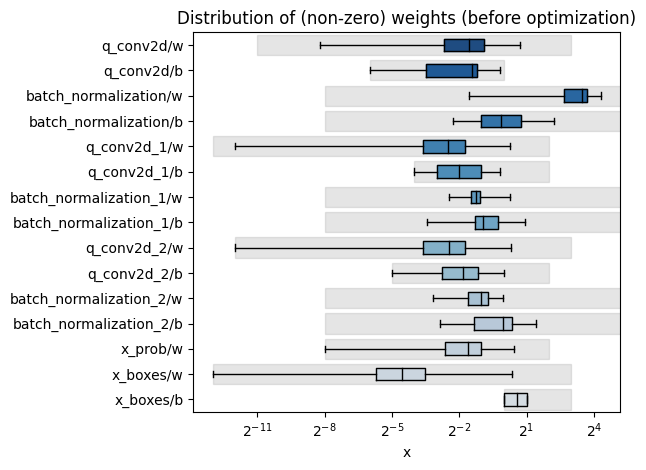

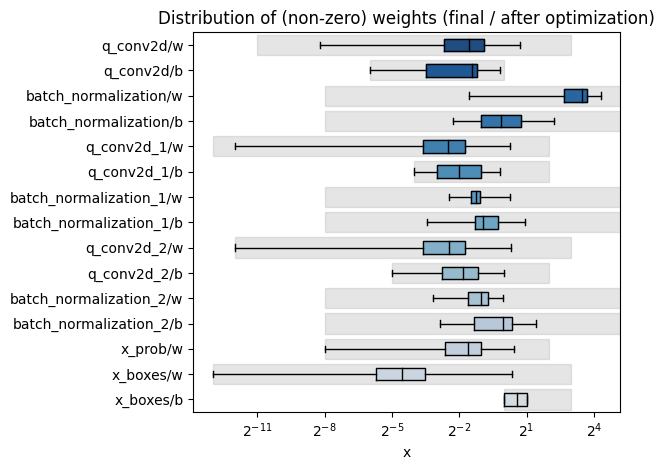

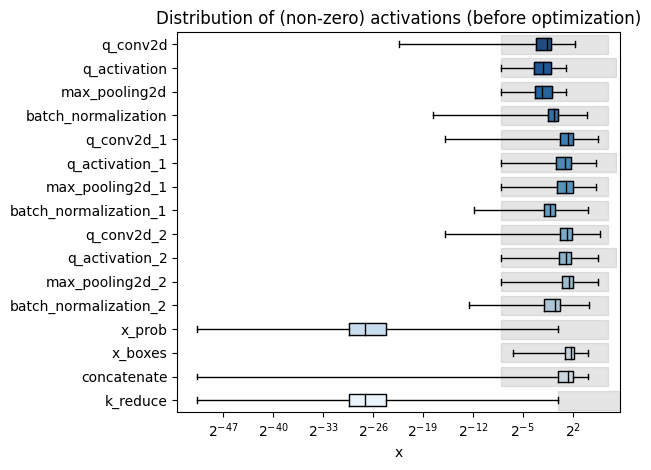

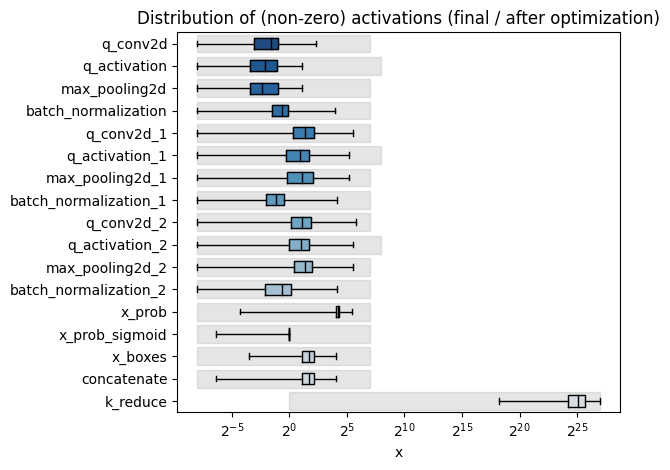

In [ ]:
#Compare weights ranges between float and HLS model
X, y = make_data(size=10)
%matplotlib inline
plots = hls4ml.model.profiling.numerical(model=model_reduce, hls_model = hls_model, X=np.ascontiguousarray(X))

Done taking outputs for Keras model.
Recompiling myproject with tracing
Writing HLS project
Done


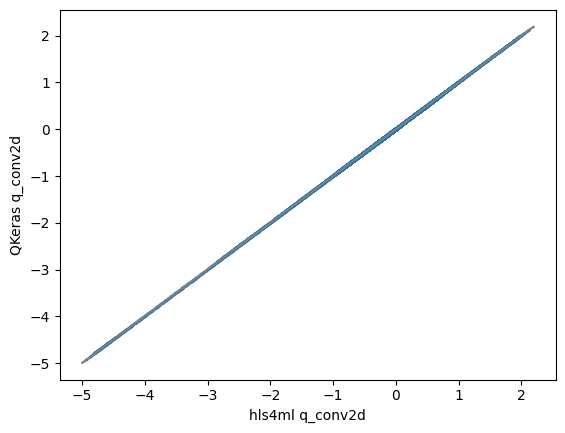

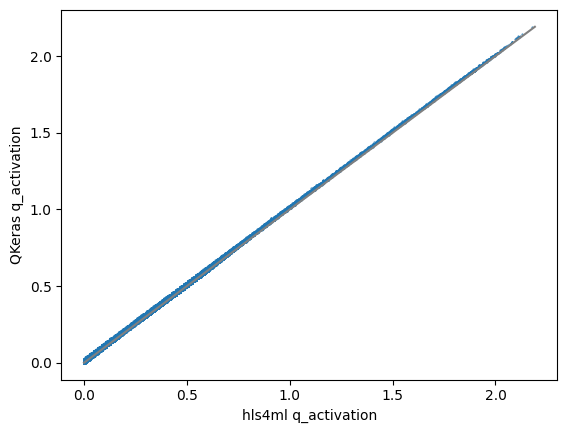

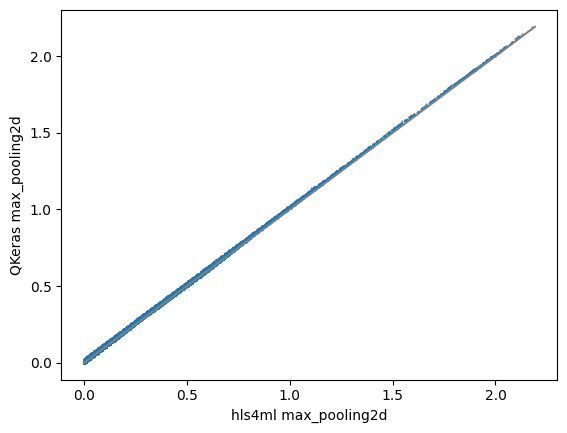

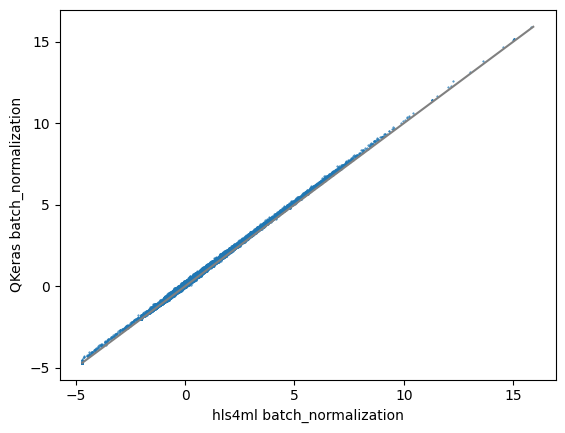

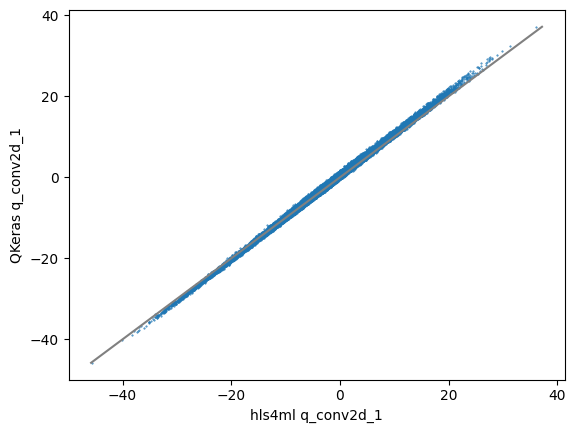

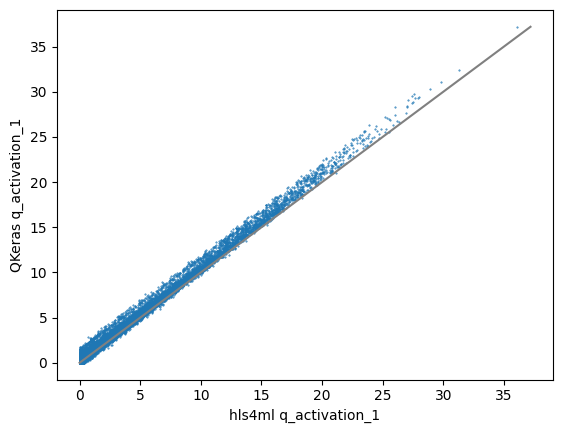

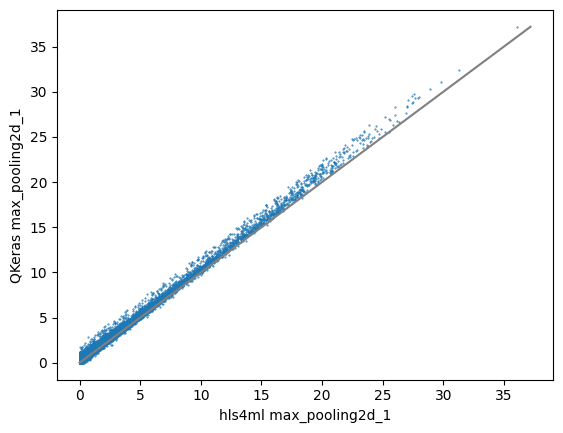

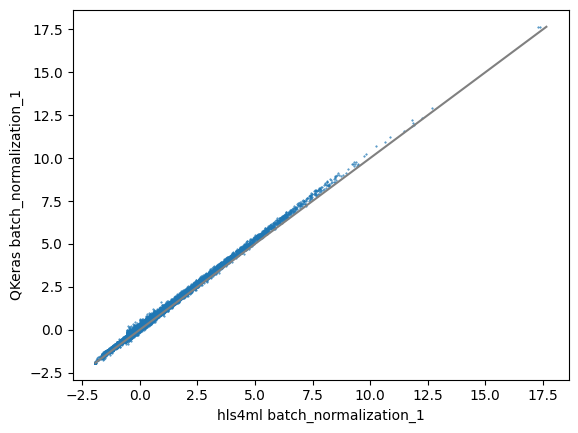

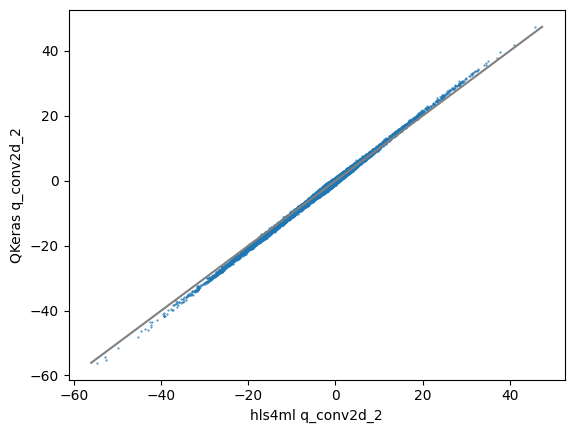

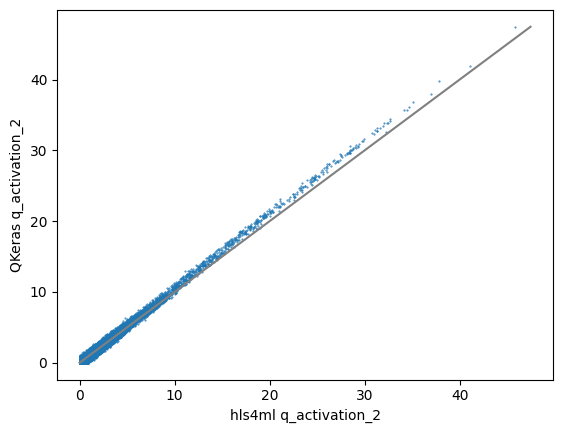

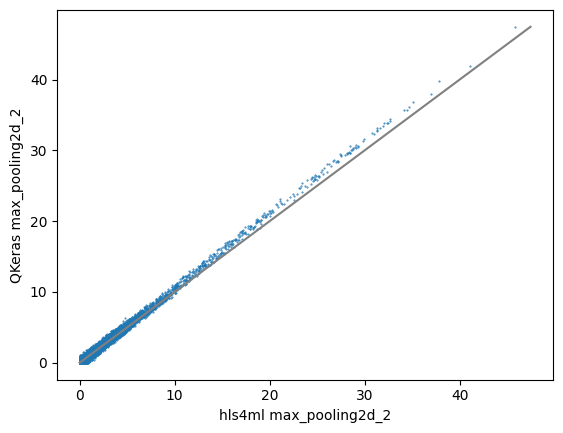

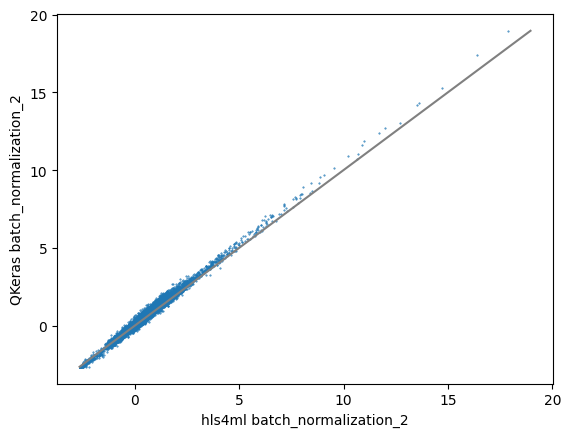

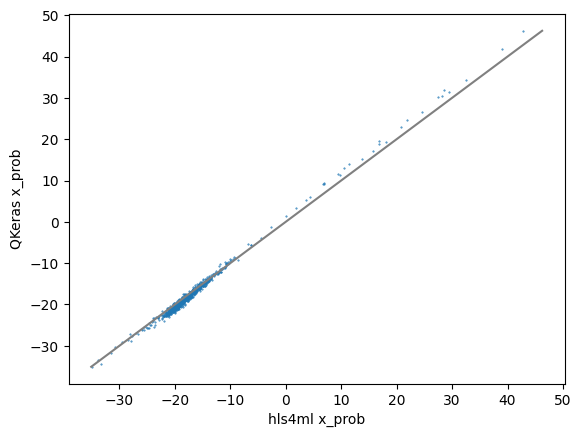

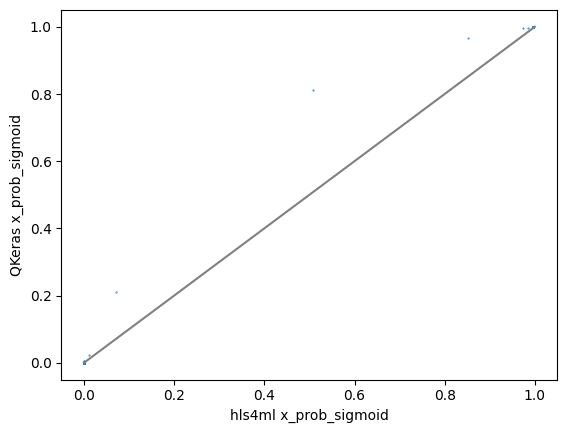

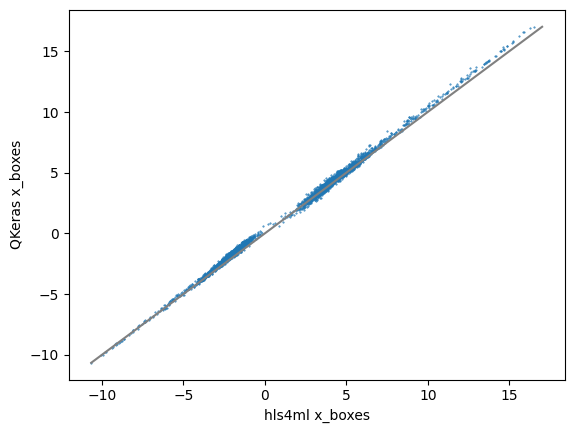

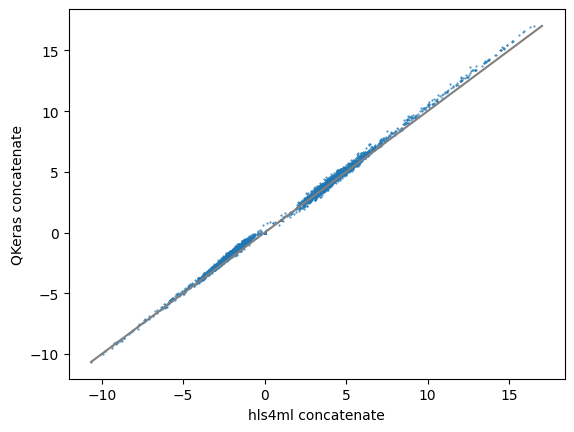

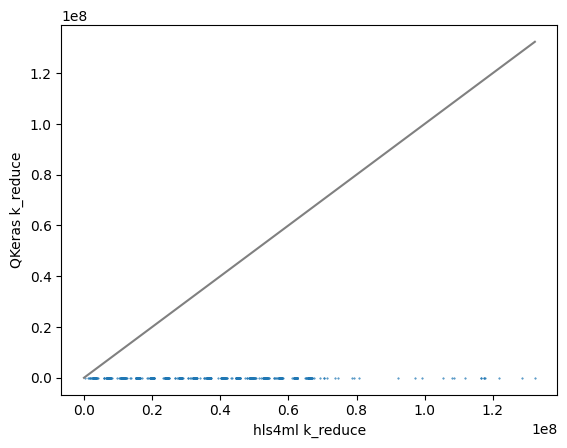

In [ ]:
#Trace Model
keras_trace = hls4ml.model.profiling.get_ymodel_keras(model_reduce, np.ascontiguousarray(X))
y_hls, hls4ml_trace = hls_model.trace(np.ascontiguousarray(X))

#Compare layer outputs
for layer in hls4ml_trace.keys():
            plt.figure()
            klayer = layer
            if "_alpha" in layer:
                klayer = layer.replace("_alpha", "")
            plt.scatter(hls4ml_trace[layer].flatten(), keras_trace[klayer].flatten(), s=0.2)
            min_x = min(np.amin(hls4ml_trace[layer]), np.amin(keras_trace[klayer]))
            max_x = max(np.amax(hls4ml_trace[layer]), np.amax(keras_trace[klayer]))
            plt.plot([min_x, max_x], [min_x, max_x], c="gray")
            plt.xlabel("hls4ml {}".format(layer))
            plt.ylabel("QKeras {}".format(klayer))

In [ ]:
# hls_predictions = hls_model.predict(X.reshape(X.shape[0], -1)).astype(np.uint64) # Not providing correct predictions
np.savetxt(OUT_DIR + "/tb_data/tb_input_features.dat", X.reshape(X.shape[0], -1), delimiter=' ')
np.savetxt(OUT_DIR + "/tb_data/tb_output_predictions.dat", np.zeros(y.shape[0:3]).reshape(y.shape[0], -1), delimiter=' ')

In [ ]:
hls_model.build(csim=True, synth=False, cosim=False, validation=False, vsynth=False, fifo_opt=False, export=False)

Exception: Vivado HLS installation not found. Make sure "vivado_hls" is on PATH.

In [ ]:
hls_predictions = np.genfromtxt(OUT_DIR + "/tb_data/csim_results.log", delimiter=' ')

In [ ]:
def bit_range(num, end_idx, start_idx):
    """
    Extracts bit range from integer

    :param num: Number from which to extract bits
    :param end_idx: Ending index (inclusive) from the right in the binary representation
    :param start_idx: Starting index (inclusive) from the right in the binary representation
    :return: Extracted bit range as an integer
    """
    mask = ((1 << (end_idx + 1)) - 1) - ((1 << start_idx) - 1)
    return (num & mask) >> start_idx


def show_predict_hardware(X, y):
    """
    Display single prediction results from the hardware (parsed from the output bit strings)

    :param X: Data sample input
    :param y: Model predictions
    """

    X = X.copy()
    channels = np.zeros((6), dtype=np.uint64)

    for i in range(64):
        channels[0] = bit_range(int(y[i]), 26, 26)
        channels[1] = bit_range(int(y[i]), 25, 19)
        channels[2] = bit_range(int(y[i]), 18, 13)
        channels[3] = bit_range(int(y[i]), 12, 6)
        channels[4] = bit_range(int(y[i]), 5, 0)

        if channels[0] < 1:
            continue

        color = 255
        # bounding box
        cv2.rectangle(X, (channels[1], channels[2]), (channels[3], channels[4]), -1, 1)

        print("prob: " + str(channels[0]) + ", x1: " + str(int(channels[1])) + ", y1: " + str(int(channels[2])) + ", x2: " + str(int(channels[3])) + ", y2: " + str(int(channels[4])))

    plt.imshow(X, cmap="gray")

show_predict_hardware(X[0], hls_predictions[0])

NameError: name 'hls_predictions' is not defined

In [ ]:
# Comment out the following two lines to disable FIFO depth optimization
config['Flows'] = ['vivado:fifo_depth_optimization']
hls4ml.model.optimizer.get_optimizer('vivado:fifo_depth_optimization').configure(profiling_fifo_depth=100_000)

In [ ]:
hls_model = hls4ml.converters.convert_from_keras_model(model_reduce,
                                                       hls_config = config,
                                                       io_type = 'io_stream',
                                                       output_dir = OUT_DIR,
                                                       part='xcku035-fbva676-2-e'
                                                       )

hls_model.compile()

In [ ]:
BOARD = "octo" # Insert board name here ("octo" or "quad")

shutil.copytree(f"board_files/{BOARD.lower()}/02_coaxlink", "my-frame-grabber-test_TEMPLATE/02_coaxlink", dirs_exist_ok=True)
shutil.copytree(f"board_files/{BOARD.lower()}/sim", "my-frame-grabber-test_TEMPLATE/04_ref_design/sim", dirs_exist_ok=True)
shutil.copy(f"board_files/{BOARD.lower()}/CustomLogic.h", "my-frame-grabber-test_TEMPLATE/05_model_design_hls/srcs")
shutil.copy(f"board_files/{BOARD.lower()}/create_vivado_project.tcl", "my-frame-grabber-test_TEMPLATE/03_scripts")

In [ ]:
!cp -r {OUT_DIR}/firmware/nnet_utils {OUT_DIR}/firmware/weights {OUT_DIR}/firmware/ap_types {OUT_DIR}/firmware/parameters.h {OUT_DIR}/firmware/defines.h my-frame-grabber-test_TEMPLATE/05_model_design_hls/srcs